# Python Plots for LGalaxies

## Import Libraries and Read Catalogs

<p>Use functions read_snap or read_tree to read catalogs. These are both defined in procedures.py. In case of read_snap, SnapshotList will be returned containing the list of snapshots read (usefull to later select galaxies in a given redshift).<p>

In [1]:
#need numpy, matplotlib, astropy, scipy

import numpy as np
%matplotlib inline

#import pandas as pd

%pylab inline
#import seaborn as sns
#sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
import sys
from scipy.ndimage import zoom 

import procedures
reload (procedures)
from procedures import *
import plots_input
reload (plots_input)
from plots_input import *

FirstFile = 0
LastFile =  0

Volume_MR = (BoxSize_MR**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 
#Volume_MRII = (BoxSize_MRII**3.0) * (LastFile - FirstFile + 1) / MaxTreeFiles 

if CatalogType=='snap':
    from LGalaxies_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_Henriques2015a_struct import PropertiesToRead
    #from LGalaxies_Henriques2015a_Rings_struct import LGalaxiesStruct
    #from LGalaxies_Henriques2015a_Rings_struct import PropertiesToRead
    (G_MR, SnapshotList) = read_snap(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead,LGalaxiesStruct,RedshiftsToRead,FullRedshiftList)
    print('Type:',G_MR['Type'])
    print('SnapNum:',G_MR['SnapNum'])

if CatalogType=='tree':    
    from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
    from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead_tree    
    (G_MR) = read_tree(DirName_MR,FirstFile,LastFile,
                     PropertiesToRead_tree,LGalaxiesStruct)    
     
    SnapshotList = np.zeros(len(RedshiftList),dtype=np.int32)
    for ii in range(0,len(RedshiftList)):                  
        G0=G_MR[ np.rint(G_MR['Redshift']*100.) == RedshiftList[ii]*100. ]             
        SnapshotList[ii]=G0['SnapNum'][0]
#endif      

print('reading done\n')
#print (np.log10(G_MR['DiskMass'][0:99]*1.e10))
#print (np.log10(G_MR['BulgeMass'][0:99]*1.e10))
#print (np.log10(G_MR['Mvir'][0:99]*1.e10))
#print (G_MR['SnapNum'][0:99])

#print (np.log10(G_MR['MetalsStellarMass'][0:99]*1.e10))
#print (G_MR[0:5])
#help(G_MR)


plt.rcParams.update({'font.size': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18, 'axes.linewidth': 2, 
                     'xtick.major.size': 6, 'xtick.major.width': 1.5, 
                     'ytick.major.size': 6, 'ytick.major.width': 1.5, 
                     'xtick.minor.size': 3, 'xtick.minor.width': 1.,                   
                     'ytick.minor.size': 3, 'ytick.minor.width': 1.})

Populating the interactive namespace from numpy and matplotlib


Reading Headers

z= 0.00  nGals =  [687]
z= 0.10  nGals =  [1243]
z= 0.24  nGals =  [1690]
z= 0.30  nGals =  [2101]
z= 0.40  nGals =  [2468]
z= 0.62  nGals =  [2743]



Reading redshift:  0.0 

File  0  nGals =  687
Type
SnapNum
CentralMvir
CentralRvir
Mvir
Rvir
Vvir
StellarMass
BulgeMass
DiskMass
MagDust

Reading redshift:  0.1 

File  0  nGals =  556
Type
SnapNum
CentralMvir
CentralRvir
Mvir
Rvir
Vvir
StellarMass
BulgeMass
DiskMass
MagDust

Reading redshift:  0.24 

File  0  nGals =  447
Type
SnapNum
CentralMvir
CentralRvir
Mvir
Rvir
Vvir
StellarMass
BulgeMass
DiskMass
MagDust

Reading redshift:  0.3 

File  0  nGals =  411
Type
SnapNum
CentralMvir
CentralRvir
Mvir
Rvir
Vvir
StellarMass
BulgeMass
DiskMass
MagDust

Reading redshift:  0.4 

File  0  nGals =  367
Type
SnapNum
CentralMvir
CentralRvir
Mvir
Rvir
Vvir
StellarMass
BulgeMass
DiskMass
MagDust

Reading redshift:  0.62 

File  0  nGals =  275
Type
SnapNum
CentralMv

/home/kmaamari/lgalaxies/lgal/AuxCode/Python/LGalaxies_Henriques2015a_struct.py:74: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('sfh_MetalsICM',np.float32,24)


## Plots

In [2]:
import plots
reload (plots)

import plots_input
reload(plots_input)

<module 'plots_input' from '/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots_input.py'>

Doing SMHM


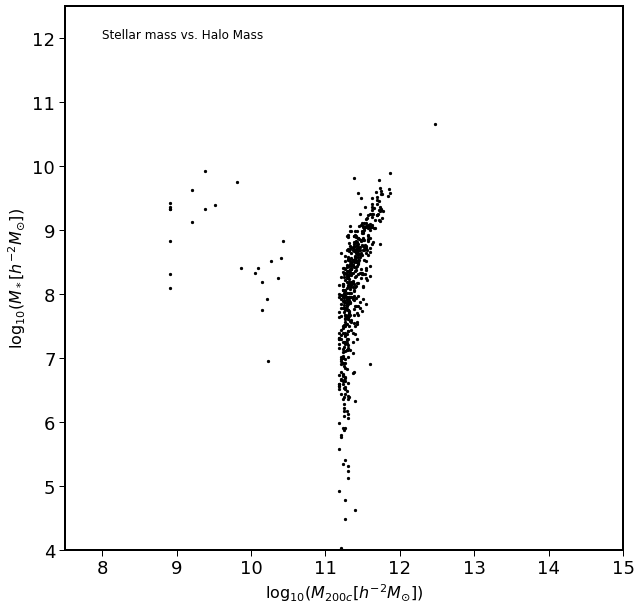

Doing SMF
/home/kmaamari/lgalaxies/lgal/output/mcmc_plus_obs0_z0.00.txt
  col1 
-------
 7.1902
 7.4402
 7.6902
 7.9402
 8.1902
 8.4402
 8.6902
 8.9402
 9.1902
 9.4402
 9.6902
 9.9402
10.1902
10.4402
10.6902
10.9402
11.1902 col4
----
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf
-inf


/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:142: RuntimeWarning: divide by zero encountered in log10
  subplot.plot(hist[1][0:len(hist[1][:])-1]+bin/2.,np.log10(hist[0][:]/(Volume_MR*bin)),
/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:151: RuntimeWarning: divide by zero encountered in log10
  print(obs['col1'],np.log10(obs['col4']))
/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:152: RuntimeWarning: divide by zero encountered in log10
  subplot.plot(obs['col1'],np.log10(obs['col4']), color='black', linewidth=2)


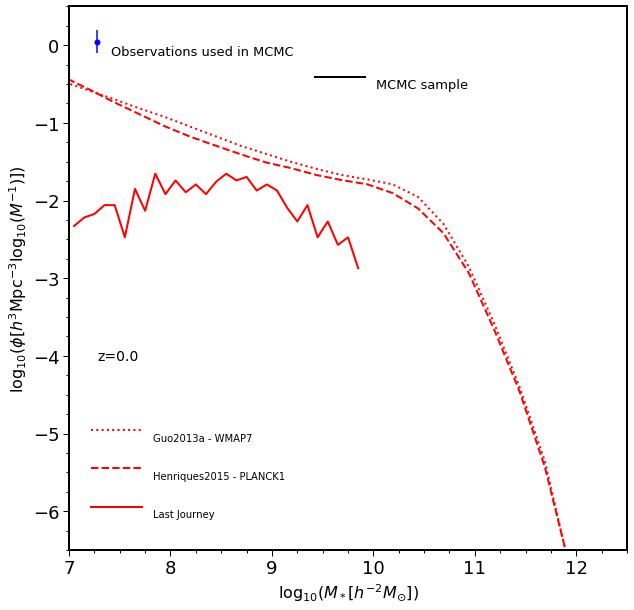

Doing BHBM


/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:318: RuntimeWarning: divide by zero encountered in log10
  obs_x = np.log10(obs['col14']*Hubble_h_WMAP7**2)


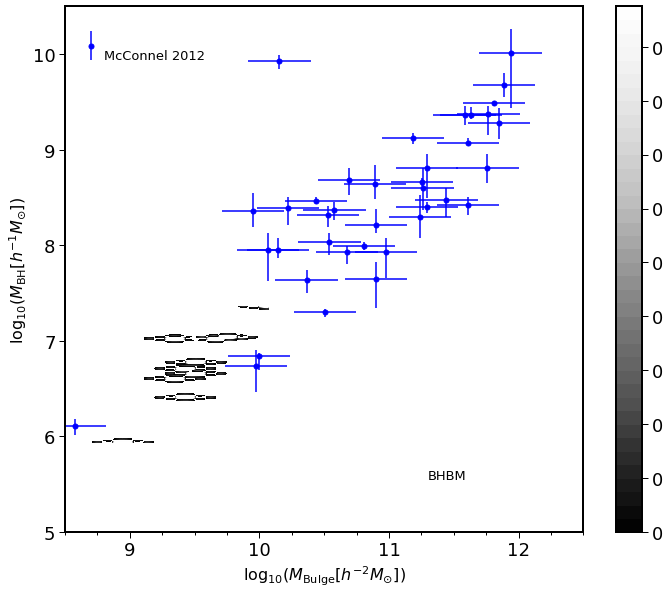

Doing SFRF


/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:376: RuntimeWarning: divide by zero encountered in log10
  subplot.plot(hist[1][0:len(hist[1][:])-1]+bin/2.,np.log10(hist[0][:]/(Volume_MR*bin)),
/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:379: RuntimeWarning: divide by zero encountered in log10
  np.savetxt('plt2y.txt',np.log10(hist[0][:]/(Volume_MR*bin)))


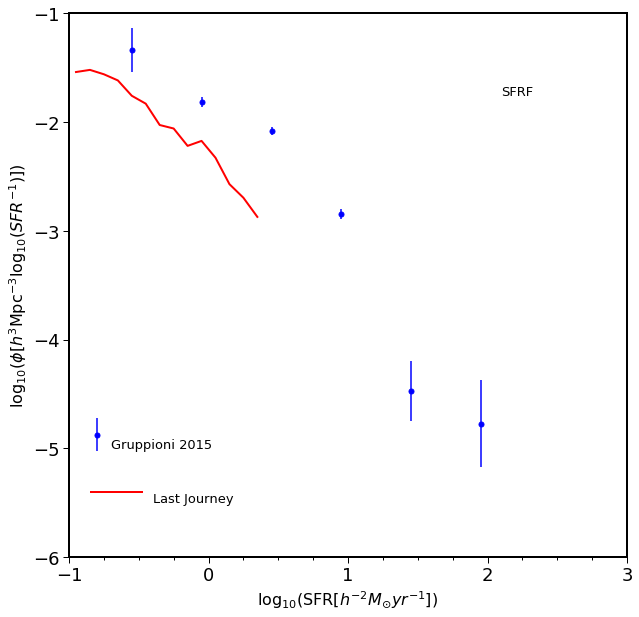

Doing HI_MF


/home/kmaamari/lgalaxies/lgal/AuxCode/Python/plots.py:532: RuntimeWarning: divide by zero encountered in log10
  subplot.plot(hist[1][0:len(hist[1][:])-1]+bin/2.,np.log10(hist[0][:]/(Volume_MR*bin)),


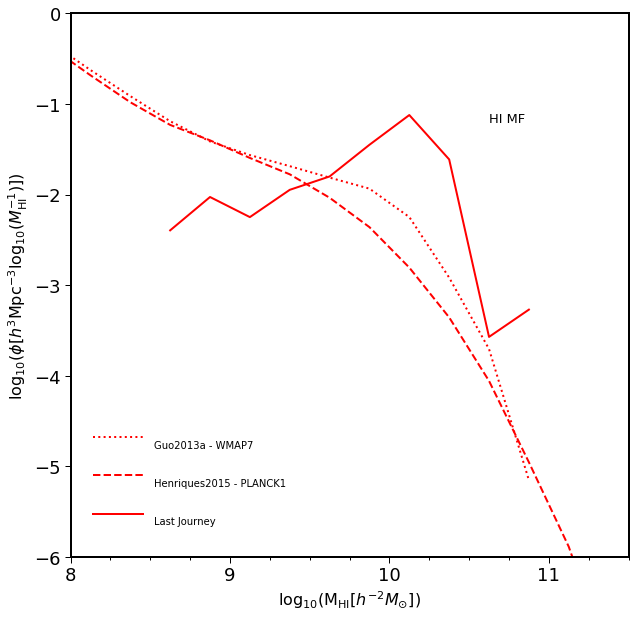

Doing sfr_vs_stellar_mass
526


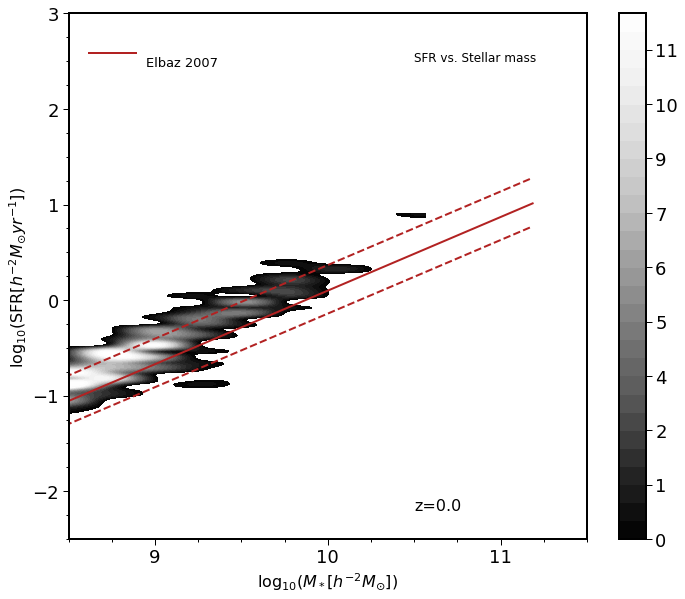


All plots done


In [3]:

with PdfPages('./fig/plots.pdf') as pdf:  
    import procedures
    reload (procedures)
    from procedures import *
    import plots_input
    reload (plots_input)
    from plots_input import *
    import plots
    reload (plots)

    if opt_stellar_mass_vs_halo_mass==1:
        print('Doing SMHM')
        from plots import stellar_mass_vs_halo_mass
        ThisRedshiftList=[0.0]        
        stellar_mass_vs_halo_mass(G_MR, ThisRedshiftList, pdf)
    
    if opt_stellar_mass_function==1:
        print('Doing SMF')
        from plots import stellar_mass_function
        ThisRedshiftList=[0.0]        
        stellar_mass_function(G_MR, Volume_MR, ThisRedshiftList, pdf)
    
    if opt_metals_vs_stellarmass==1:
        print('Doing metals_vs_stellarmass')
        from plots import metals_vs_stellarmass
        ThisRedshiftList=[0.1,3.]
        metals_vs_stellarmass(G_MR, ThisRedshiftList, pdf)
        
    if opt_BHBM==1:
        print('Doing BHBM')
        from plots import BHBM
        ThisRedshiftList=[0.0]        
        BHBM(G_MR, ThisRedshiftList, pdf)    
        
    if opt_SFRF==1:
        print('Doing SFRF')
        from plots import SFRF
        ThisRedshiftList=[0.0]        
        SFRF(G_MR, Volume_MR, ThisRedshiftList, pdf)
        
    if opt_gas_fraction==1:
        print('Doing gas_fraction')
        from plots import gas_fraction
        ThisRedshiftList=[0.0]        
        gas_fraction(G_MR, ThisRedshiftList, pdf)
        
    if opt_HI_MF==1:
        print('Doing HI_MF')
        from plots import HI_MF
        ThisRedshiftList=[0.0]        
        HI_MF(G_MR, Volume_MR, ThisRedshiftList, pdf)
        
    if opt_sfr_vs_stellar_mass==1:
        print('Doing sfr_vs_stellar_mass')
        from plots import sfr_vs_stellar_mass
        ThisRedshiftList=[0.0]        
        sfr_vs_stellar_mass(G_MR, ThisRedshiftList, pdf)
        
    if opt_ur_vs_r==1:
        print('Doing ur_vs_r')
        from plots import ur_vs_r
        ThisRedshiftList=[0.0]        
        ur_vs_r(G_MR, ThisRedshiftList, pdf)
        
    if opt_UVJ_colour==1:
        print('Doing UVJ_colour')
        from plots import UVJ_colour
        ThisRedshiftList=[0.4,1.0,2.0,3.0]        
        UVJ_colour(G_MR, ThisRedshiftList, pdf)
        
    if opt_redfraction_color_cut==1:
        print('Doing redfraction_color_cut')
        from plots import redfraction_color_cut
        ThisRedshiftList=[0.0,0.4,1.0,2.0,3.0]        
        redfraction_color_cut(G_MR, ThisRedshiftList, pdf)
               
    print('')
    print('All plots done')
        
#end with PdfPages('./fig/plots.pdf') as pdf: 

## Histograms

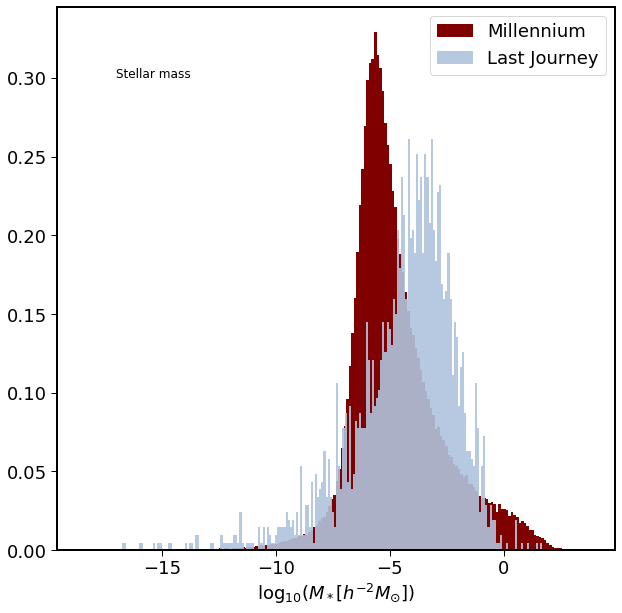

In [4]:
plt.figure(figsize=(10,10))
plt.hist(np.log(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/stellarMass.txt')),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log(G_MR[G_MR['StellarMass']>0]['StellarMass']),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.text(-17,0.3,"Stellar mass",size=12)
plt.xlabel('$\mathrm{log_{10}}(M_*[h^{-2}M_{\odot}])$')
plt.show()

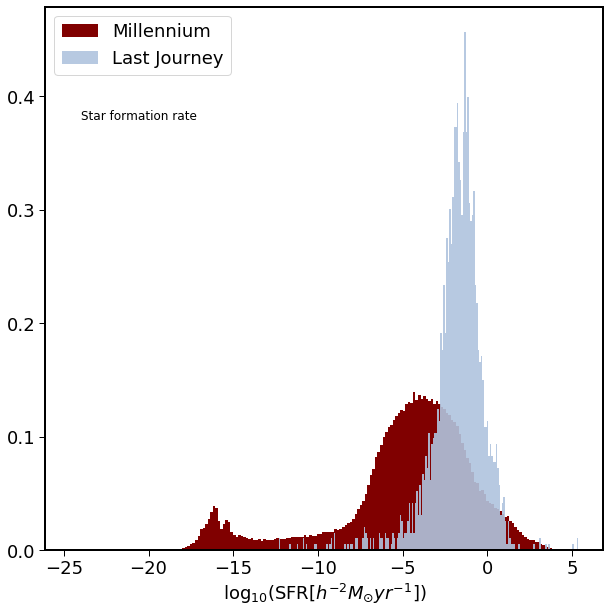

In [5]:
plt.figure(figsize=(10,10))
plt.hist(np.log(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/Sfr.txt')),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log(G_MR[G_MR['Sfr']>0]['Sfr']),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.xlabel('$\mathrm{log_{10}}(\mathrm{SFR}[h^{-2}M_{\odot}yr^{-1}])$')
plt.text(-24,0.38,"Star formation rate",size=12)
plt.legend()
plt.show()

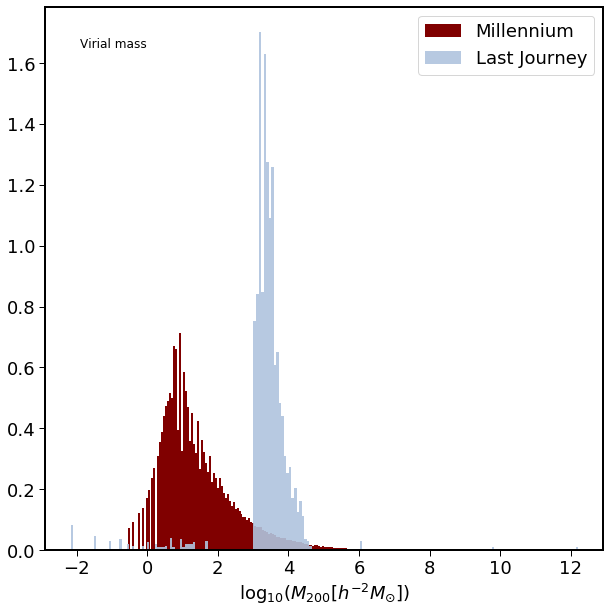

In [6]:
plt.figure(figsize=(10,10))
plt.hist(np.log(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/mvir.txt')),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log(G_MR['Mvir']),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.xlabel('$\mathrm{log_{10}}(M_{200}[h^{-2}M_{\odot}])$')
plt.text(-1.9,1.65,"Virial mass",size=12)
plt.legend()
plt.show()

In [7]:
np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/mvir.txt')[:300]

array([4.70491409e+00, 9.31912136e+00, 9.60879147e-01, 8.87088699e+01,
       2.30437922e+00, 2.49796271e+00, 1.53766477e+00, 9.50448837e+01,
       4.12949228e+00, 9.02449188e+01, 9.88895321e+00, 2.35228958e+01,
       3.16952062e+00, 1.92025204e+01, 9.60249066e-01, 1.48821421e+01,
       1.22912855e+01, 1.63350415e+00, 1.32499866e+01, 2.78490162e+00,
       7.29727793e+00, 1.17137985e+01, 1.21938572e+01, 6.81722212e+00,
       9.88961315e+00, 9.60156441e+00, 8.64145660e+00, 5.47302151e+00,
       3.74476528e+00, 3.55273581e+00, 2.40053558e+00, 3.45672226e+00,
       2.78460741e+00, 2.30451965e+00, 2.30451965e+00, 5.76160908e-01,
       1.82442653e+00, 1.44034898e+00, 2.68858552e+00, 8.64225984e-01,
       1.24830973e+00, 1.05626965e+00, 1.24830973e+00, 1.31539612e+01,
       1.05626965e+00, 6.72185063e-01, 8.64225984e-01, 8.64225984e-01,
       8.16138935e+00, 6.62598991e+00, 1.00869112e+01, 2.49694467e+00,
       2.40079427e+00, 1.92163730e+00, 4.20906677e+01, 1.72972429e+00,
      

In [8]:
G_MR['Mvir'][:300]

array([2.7186039e+01, 2.1748838e+01, 2.1748838e+01, 2.7186039e+01,
       2.7186039e+01, 2.2836306e+01, 2.6098623e+01, 2.6098623e+01,
       2.2836306e+01, 4.4585175e+01, 2.1748838e+01, 2.2836306e+01,
       2.3923737e+01, 2.1748838e+01, 2.1748838e+01, 2.6098623e+01,
       2.3923737e+01, 2.2836306e+01, 2.3923737e+01, 2.2836306e+01,
       2.2836306e+01, 2.7186039e+01, 4.7847462e+01, 2.7186039e+01,
       2.7186039e+01, 2.8273493e+01, 3.2623245e+01, 2.1748838e+01,
       4.2410263e+01, 2.8273493e+01, 2.8273493e+01, 2.6098623e+01,
       2.8273493e+01, 2.3923737e+01, 2.3923737e+01, 2.9360918e+01,
       3.1535839e+01, 2.8273493e+01, 3.3710678e+01, 5.9809311e+01,
       4.5672546e+01, 2.7186039e+01, 3.3710678e+01, 3.5885597e+01,
       2.3923737e+01, 2.1748838e+01, 2.5011200e+01, 2.8273493e+01,
       2.1748838e+01, 2.7186039e+01, 4.0235405e+01, 4.5672546e+01,
       2.1748838e+01, 2.8273493e+01, 3.1535839e+01, 4.6759991e+01,
       2.3923737e+01, 2.7186039e+01, 2.3923737e+01, 2.1748838e

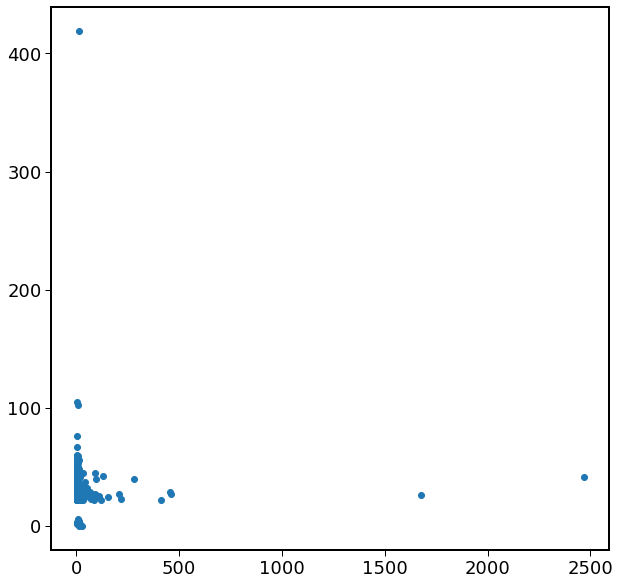

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/mvir.txt')[:300],G_MR['Mvir'][:300])

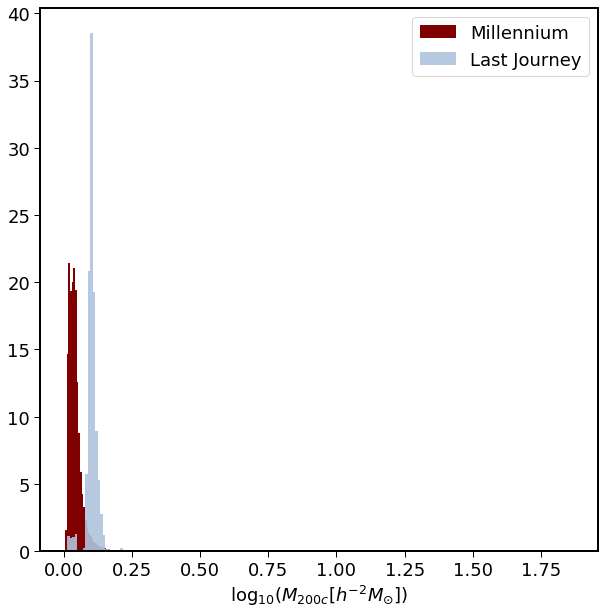

In [10]:
plt.figure(figsize=(10,10))
plt.hist(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/Rvir.txt'),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(G_MR['Rvir'],density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.xlabel('$\mathrm{log_{10}}(M_{200c}[h^{-2}M_{\odot}])$')
plt.legend()
plt.show()

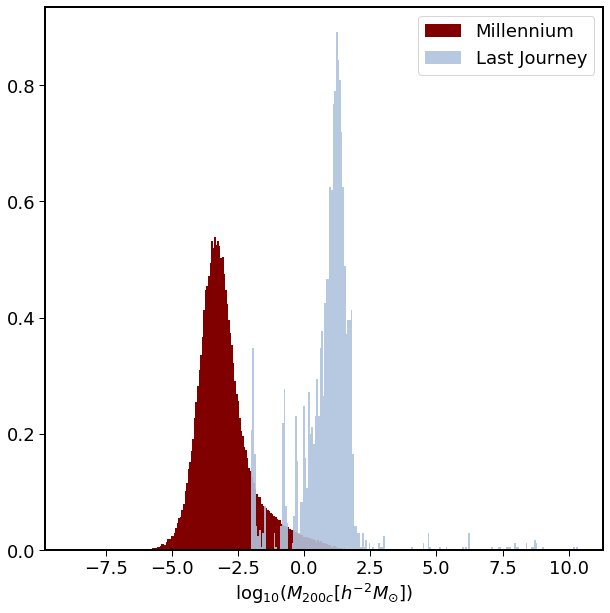

In [11]:
plt.figure(figsize=(10,10))
plt.hist(np.log(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/coldgas.txt')),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log(G_MR['ColdGas']),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.xlabel('$\mathrm{log_{10}}(M_{200c}[h^{-2}M_{\odot}])$')
plt.legend()
plt.show()

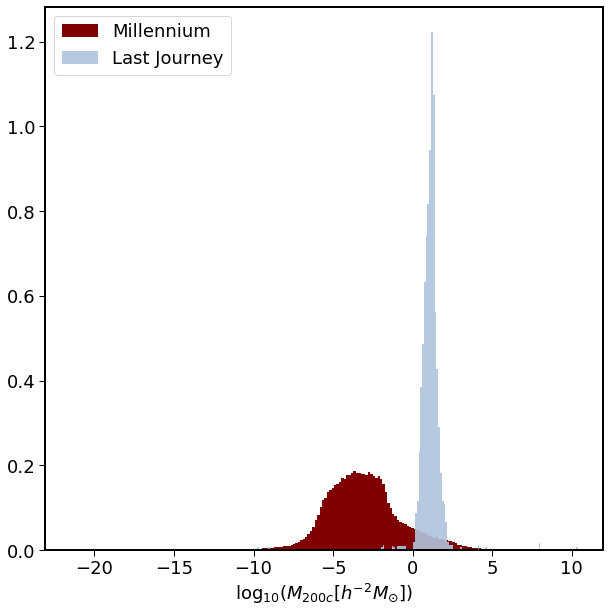

In [12]:
plt.figure(figsize=(10,10))
plt.hist(np.log(np.loadtxt('../../../../LGalaxies_PublicRepository/AuxCode/Python/HotGas.txt')),density=True,bins=200,color='maroon',label='Millennium')
plt.hist(np.log(G_MR[G_MR['HotGas']>0]['HotGas']),density=True,bins=200,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.xlabel('$\mathrm{log_{10}}(M_{200c}[h^{-2}M_{\odot}])$')
plt.legend()
plt.show()